In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
import matplotlib.patches as mpatches

from sklearn.preprocessing import minmax_scale,scale


In [2]:
path_data='/lustre/groups/ml01/workspace/karin.hrovatin/data/pancreas/scRNA/combined/'
path_de='/lustre/groups/ml01/workspace/karin.hrovatin/data/pancreas/scRNA/combined/de/'
path_de1=path_de+'de_diseased_T1_NODelim_meld/'
path_de2=path_de+'de_diseased_T2_VSGSTZ_meld_covarStudy/'
path_genes='/lustre/groups/ml01/workspace/karin.hrovatin/data/pancreas/gene_lists/'

In [3]:
# Saving figures
path_fig='/lustre/groups/ml01/workspace/karin.hrovatin/data/pancreas/figures/paper/'

In [4]:
# Load T1 and T2 DE results
summary_t1=pd.read_table(path_de1+'deDataClusters.tsv',index_col=0)
summary_t2=pd.read_table(path_de2+'deDataClusters.tsv',index_col=0)

Overlap between T1D and T2D DE clusters

In [6]:
# Obverlap between genes as ratio of the smaller group
overlap=pd.DataFrame(index=sorted(summary_t1.hc.dropna().unique()),
                     columns=sorted(summary_t2.hc.dropna().unique()))
overlap.index.name='NOD'
overlap.columns.name='db/db+mSTZ'
for cl1 in overlap.index:
    for cl2 in overlap.columns:
        g1=set(summary_t1.query('hc==@cl1').index)
        g2=set(summary_t2.query('hc==@cl2').index)
        g1g2=g1&g2
        o=len(g1g2)/min([len(g1),len(g2)])
        overlap.at[cl1,cl2]=o

        # Also print overlap
        if len(g1g2)>0:
            print('NOD %s and db/db+mSTZ %s'%(cl1,cl2))
            print(sorted(summary_t1.loc[g1g2,'gene_symbol'].to_list()))
overlap=overlap.astype(float)

NOD down_1 and db/db+mSTZ down_3
['Npy']
NOD down_1 and db/db+mSTZ down_6
['Dact2']
NOD down_1 and db/db+mSTZ down_7
['Emid1', 'Gm15234', 'Zim1']
NOD down_1 and db/db+mSTZ up_1
['Fxyd6', 'Ppy', 'Pyy']
NOD down_2 and db/db+mSTZ down_2
['Gadd45b', 'Maff', 'Prr7']
NOD down_2 and db/db+mSTZ down_3
['A230051N06Rik', 'Gipr', 'Hcar2', 'Lmna', 'Mpp7', 'Mpzl1', 'Slc20a1', 'T2', 'Tsc22d3', 'Tuba1a']
NOD down_2 and db/db+mSTZ down_5
['Mt1', 'Mt2', 'Nnat', 'Tppp3']
NOD down_2 and db/db+mSTZ down_6
['Cib3', 'Dbp', 'Mpp3', 'Stard4']
NOD down_3 and db/db+mSTZ up_2
['Krtap17-1']
NOD down_4 and db/db+mSTZ down_2
['Adora3', 'Arc', 'Arl4d', 'Atf3', 'Btg2', 'C2cd4b', 'Cbx4', 'Ccdc178', 'Chd7', 'Ddit3', 'Dnajb1', 'Dusp1', 'Dusp18', 'Egr1', 'Egr4', 'Fam118a', 'Fos', 'Fosb', 'Hspa1a', 'Hspa1b', 'Ier2', 'Jun', 'Junb', 'Klf4', 'Nr4a1', 'Nr4a2', 'Per1', 'Ppargc1a', 'Rasd1', 'Rfx2', 'Slc5a3', 'Socs3', 'Tnfaip3', 'Usp2']
NOD down_4 and db/db+mSTZ down_3
['Lonrf1', 'Siah2', 'Usp27x']
NOD down_4 and db/db+mSTZ down

Plot overlap

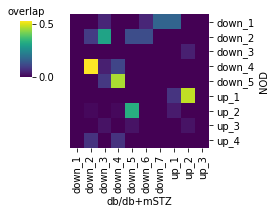

In [7]:
# heatmap size params
w_dend=1.3
nrow=overlap.shape[0]*0.3
ncol=overlap.shape[1]*0.26
w=ncol+w_dend
h=nrow+w_dend
# Heatmap
g=sb.clustermap(overlap,cmap='viridis',
                col_cluster=False,row_cluster=False,
              figsize=(h,w),
            dendrogram_ratio=(w_dend/h,w_dend/w),
                cbar_pos=(0.1,0.5,0.04,0.2))
g.ax_cbar.set_title('overlap',fontsize=10)   

#remove dendrogram
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)


# Save
plt.savefig(path_fig+'heatmap_beta_DEdiabetesNODelim-VSGSTZ_cloverlap.png',
            dpi=300,bbox_inches='tight')